In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./data/stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in the 'gender' variable: ", end=" ")
print(data['gender'].unique())

print("Categories in the 'race_ethnicity' variable: ", end=" ")
print(data['race_ethnicity'].unique())

print("Categories in the 'parental_level_of_education' variable: ", end=" ")
print(data['parental_level_of_education'].unique())

print("Categories in the 'lunch' variable: ", end=" ")
print(data['lunch'].unique())

print("Categories in the 'test_preparation_course' variable: ", end=" ")
print(data['test_preparation_course'].unique())

Categories in the 'gender' variable:  ['female' 'male']
Categories in the 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in the 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in the 'lunch' variable:  ['standard' 'free/reduced']
Categories in the 'test_preparation_course' variable:  ['none' 'completed']


In [11]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

In [12]:
print("There are {} numerical featuers: {}".format(len(numerical_features), numerical_features))
print("\nThere are {} categorical featuers: {}".format(len(categorical_features), categorical_features))

There are 3 numerical featuers: ['math_score', 'reading_score', 'writing_score']

There are 5 categorical featuers: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['avg_score'] = data['total_score'] / 3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full = data[data['math_score'] == 100]['avg_score'].count()
reading_full = data[data['reading_score'] == 100]['avg_score'].count()
writing_full = data[data['writing_score'] == 100]['avg_score'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [15]:
math_less20 = data[data['math_score'] <= 20]['avg_score'].count()
reading_less20 = data[data['reading_score'] <= 20]['avg_score'].count()
writing_less20 = data[data['writing_score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Math: {math_less20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less20}')

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


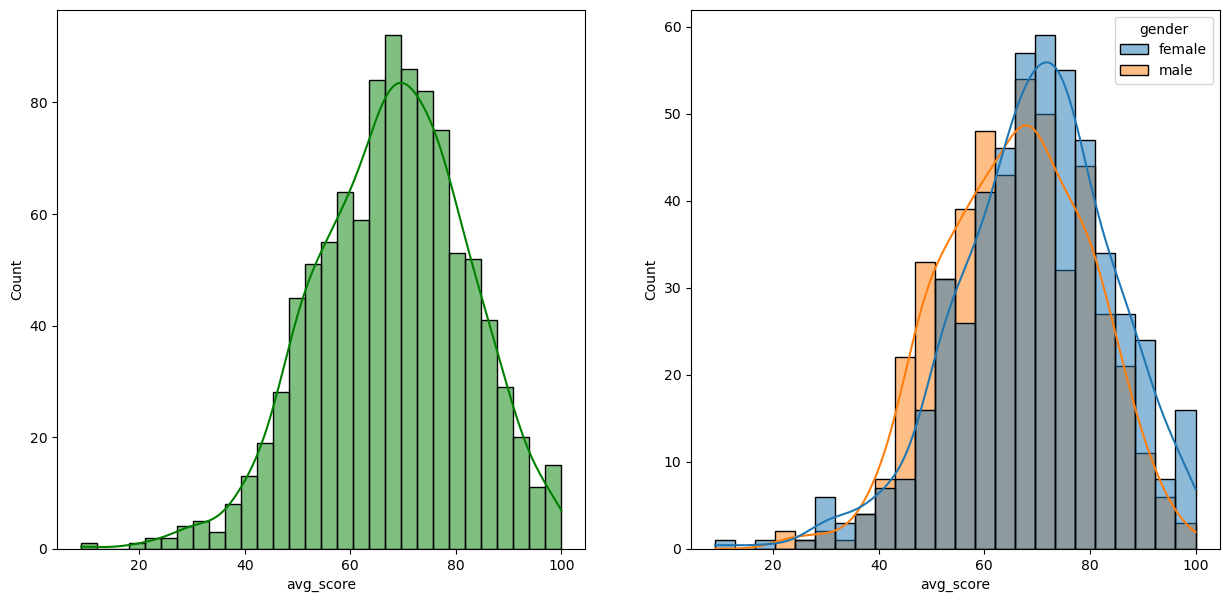

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='avg_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='avg_score', kde=True, hue='gender')
plt.show()

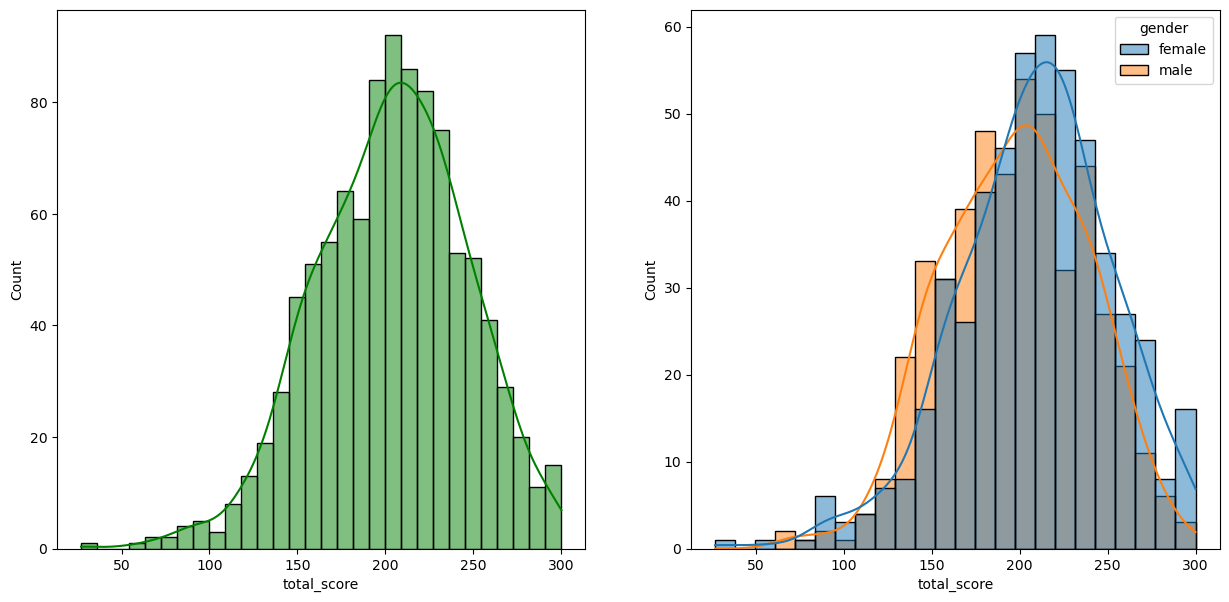

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='total_score', kde=True, hue='gender')
plt.show()

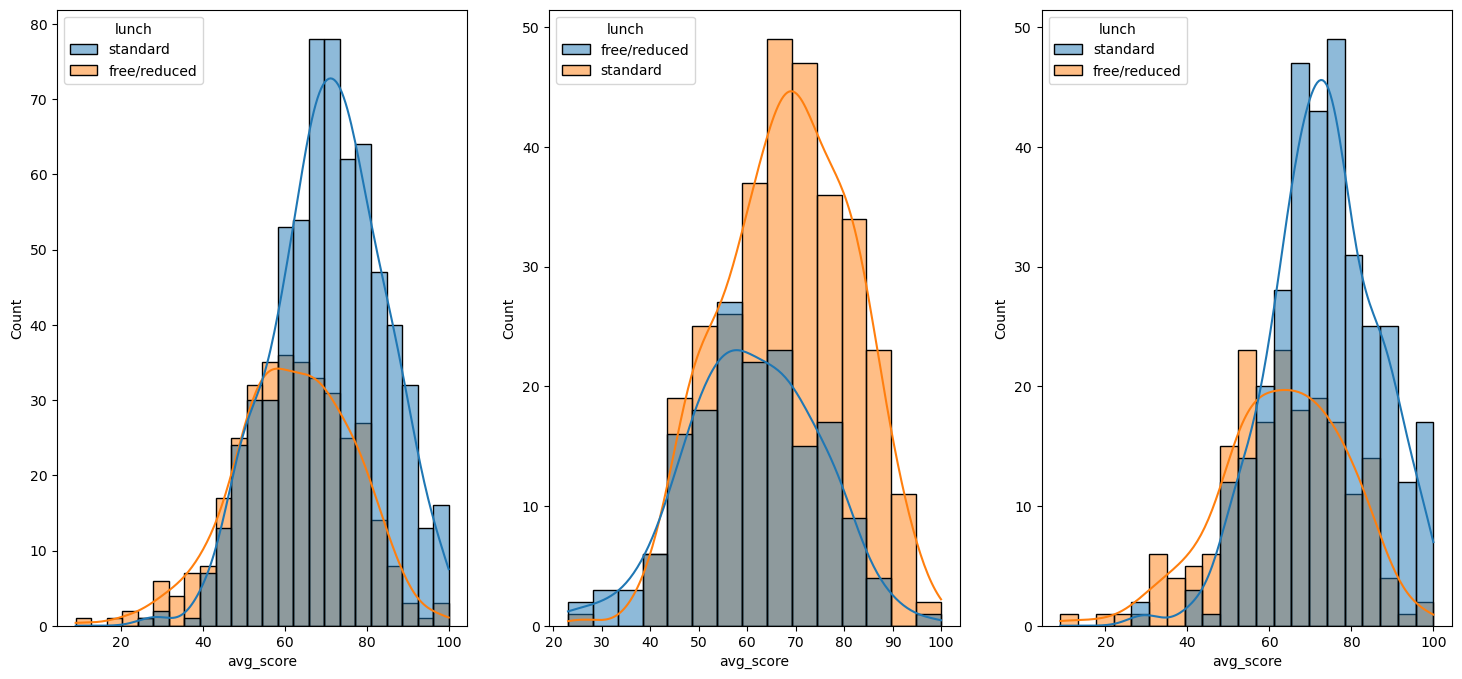

In [18]:
plt.subplots(1, 3, figsize=(18, 8))
plt.subplot(131)
sns.histplot(data=data, x='avg_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data['gender'] == 'male'], x = 'avg_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data['gender'] == 'female'], x = 'avg_score', kde=True, hue='lunch')
plt.show()

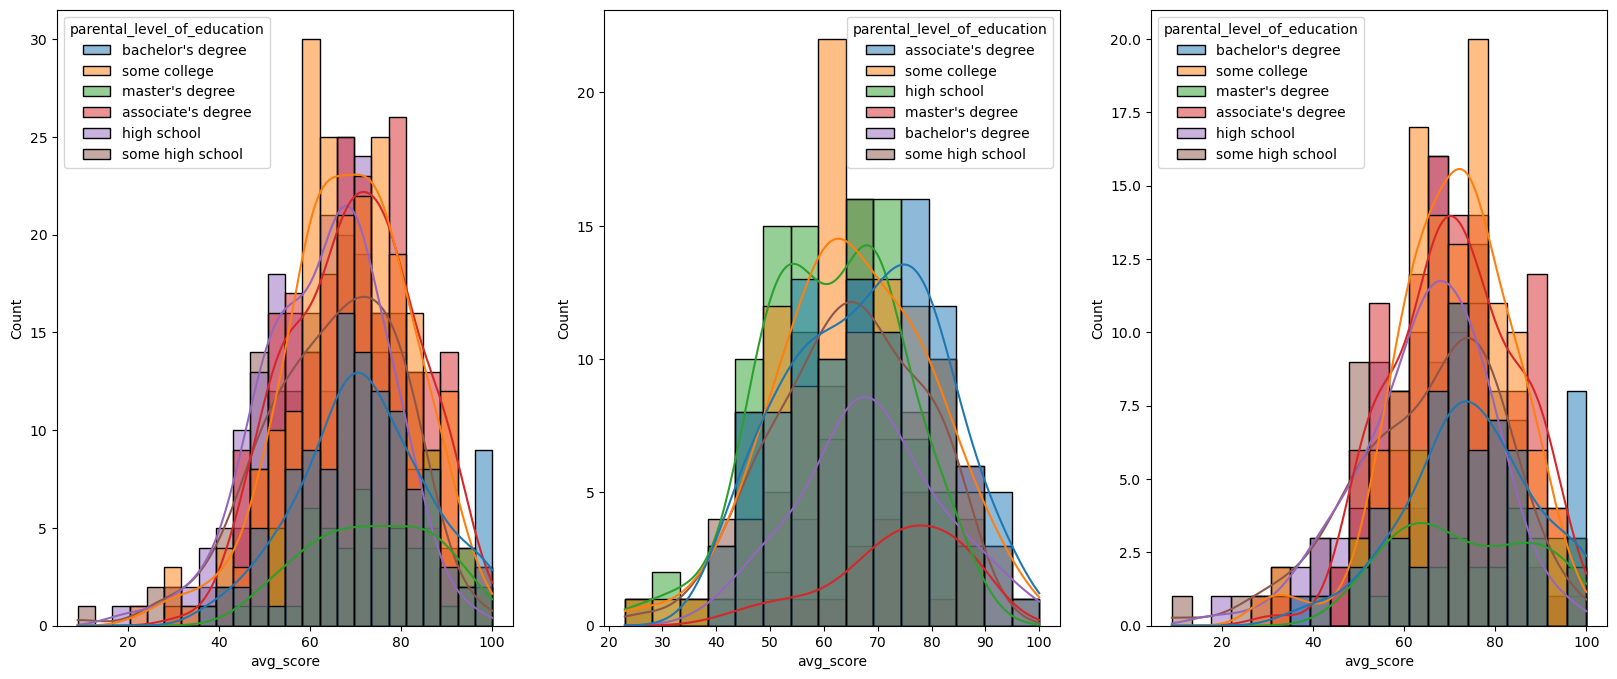

In [19]:
plt.subplots(1, 3, figsize=(20, 8))
plt.subplot(131)
ax = sns.histplot(data=data,x='avg_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
ax = sns.histplot(data=data[data['gender']=='male'], x='avg_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
ax = sns.histplot(data=data[data['gender'] == 'female'], x='avg_score', kde=True, hue='parental_level_of_education')
plt.show()

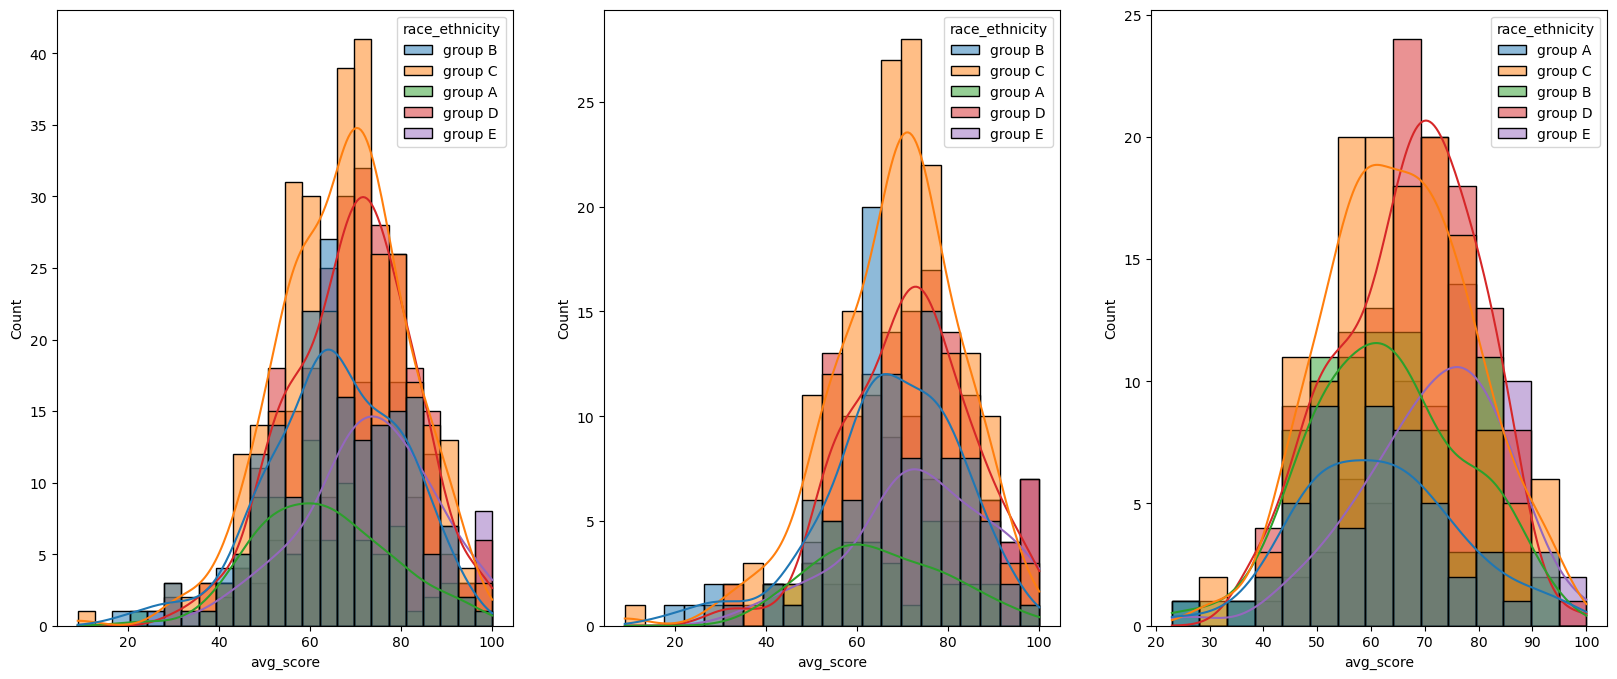

In [20]:
plt.subplots(1, 3, figsize=(20,8))
plt.subplot(131)
ax = sns.histplot(data=data, x='avg_score', kde=True, hue='race_ethnicity')
plt.subplot(132)
ax = sns.histplot(data=data[data['gender'] == 'female'], x='avg_score', kde=True, hue='race_ethnicity')
plt.subplot(133)
ax = sns.histplot(data=data[data['gender'] == 'male'], x='avg_score', kde=True, hue='race_ethnicity')
plt.show()

In [21]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


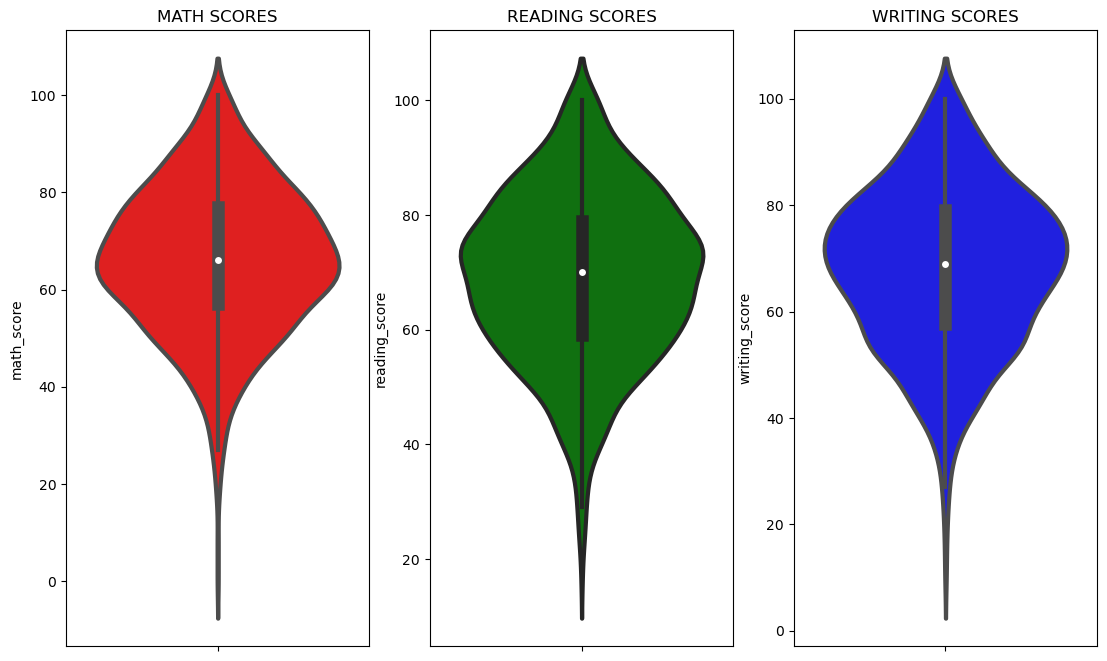

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=data, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=data, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=data, color='blue', linewidth=3)
plt.show()

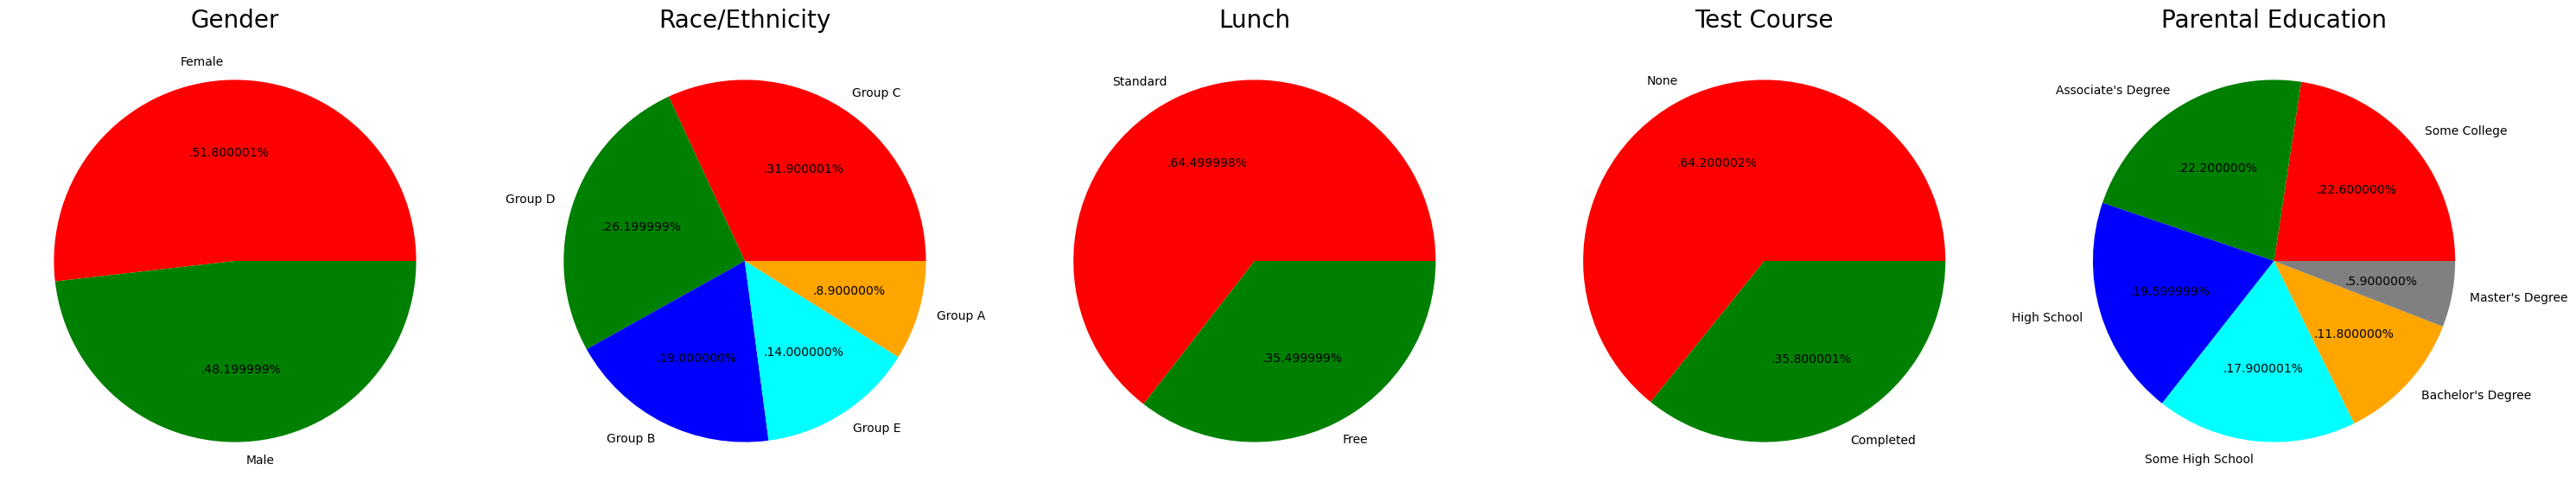

In [23]:
plt.rcParams['figure.figsize'] = (30, 25)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange', 'grey']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

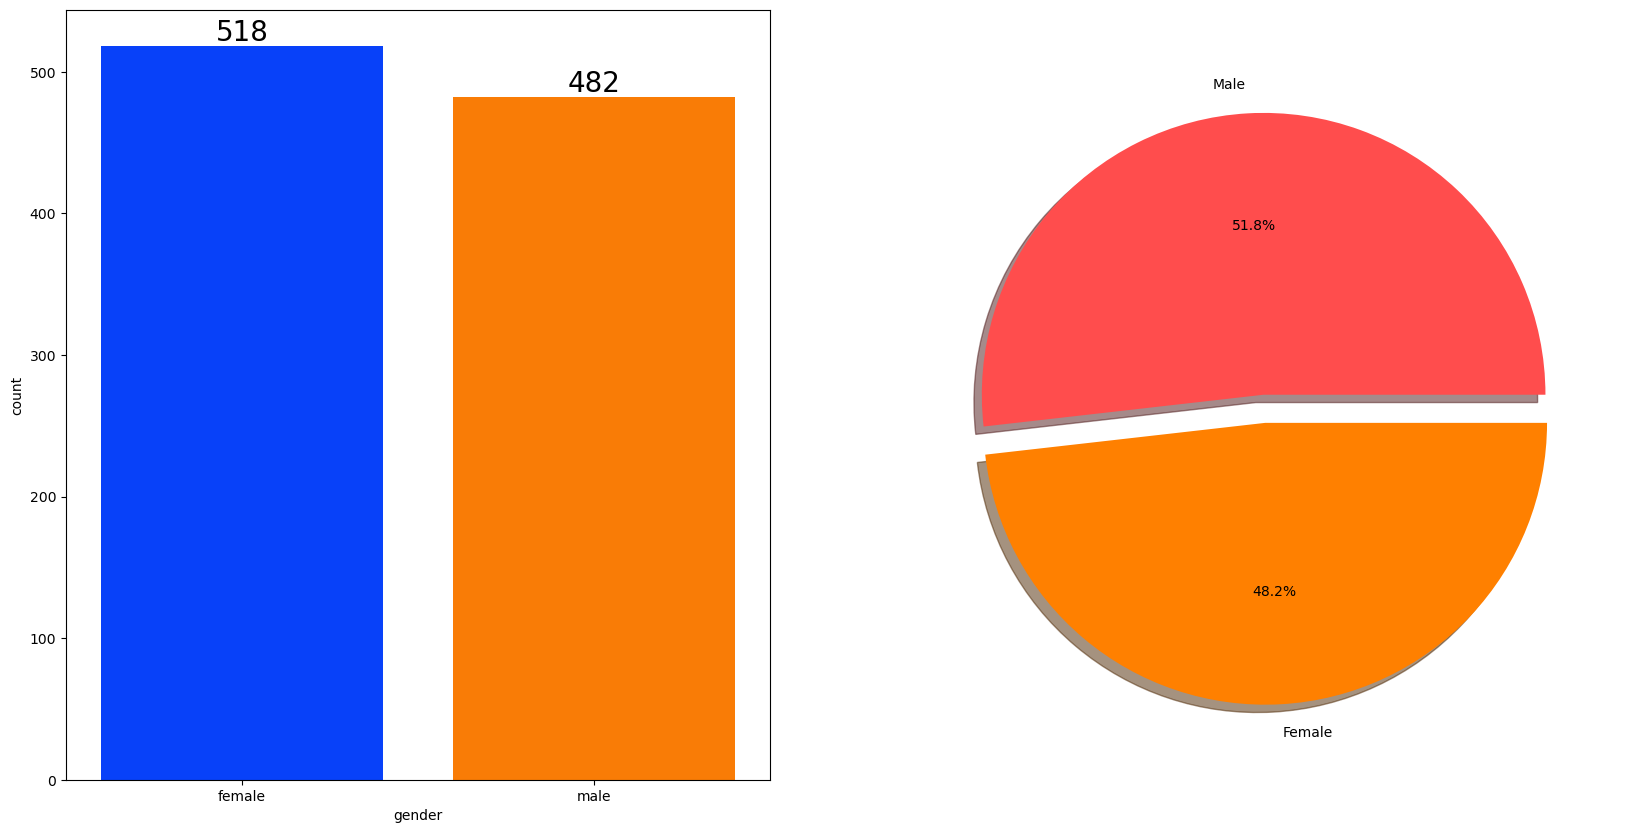

In [24]:
f, ax=plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=data['gender'], data=data, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=data['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

In [31]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_features

['math_score', 'reading_score', 'writing_score', 'total_score', 'avg_score']

In [32]:
gender_group = data.groupby('gender')[numerical_features].mean()
gender_group

,math_score,reading_score,writing_score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


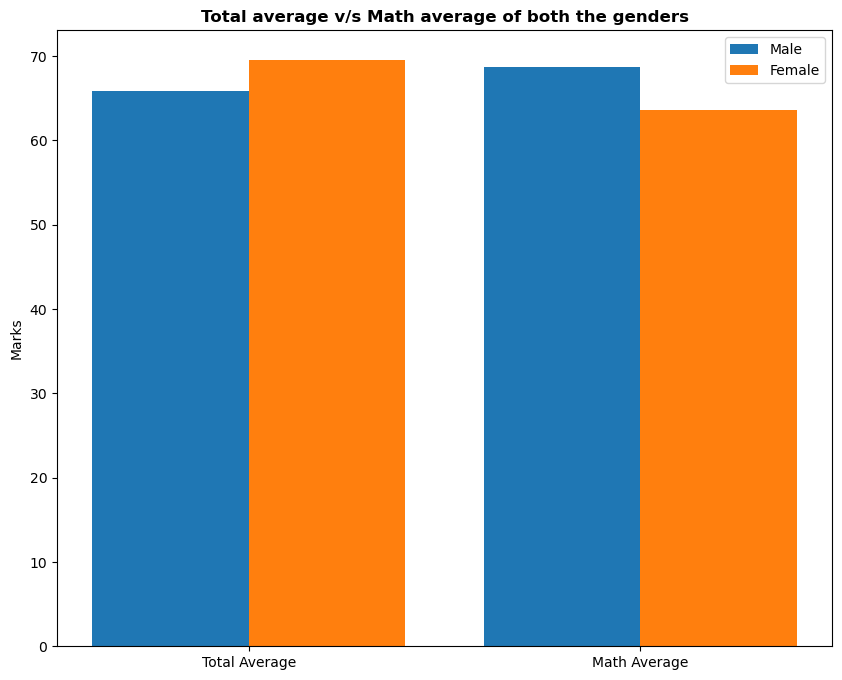

In [33]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average of both the genders", fontweight='bold')
plt.legend()
plt.show()

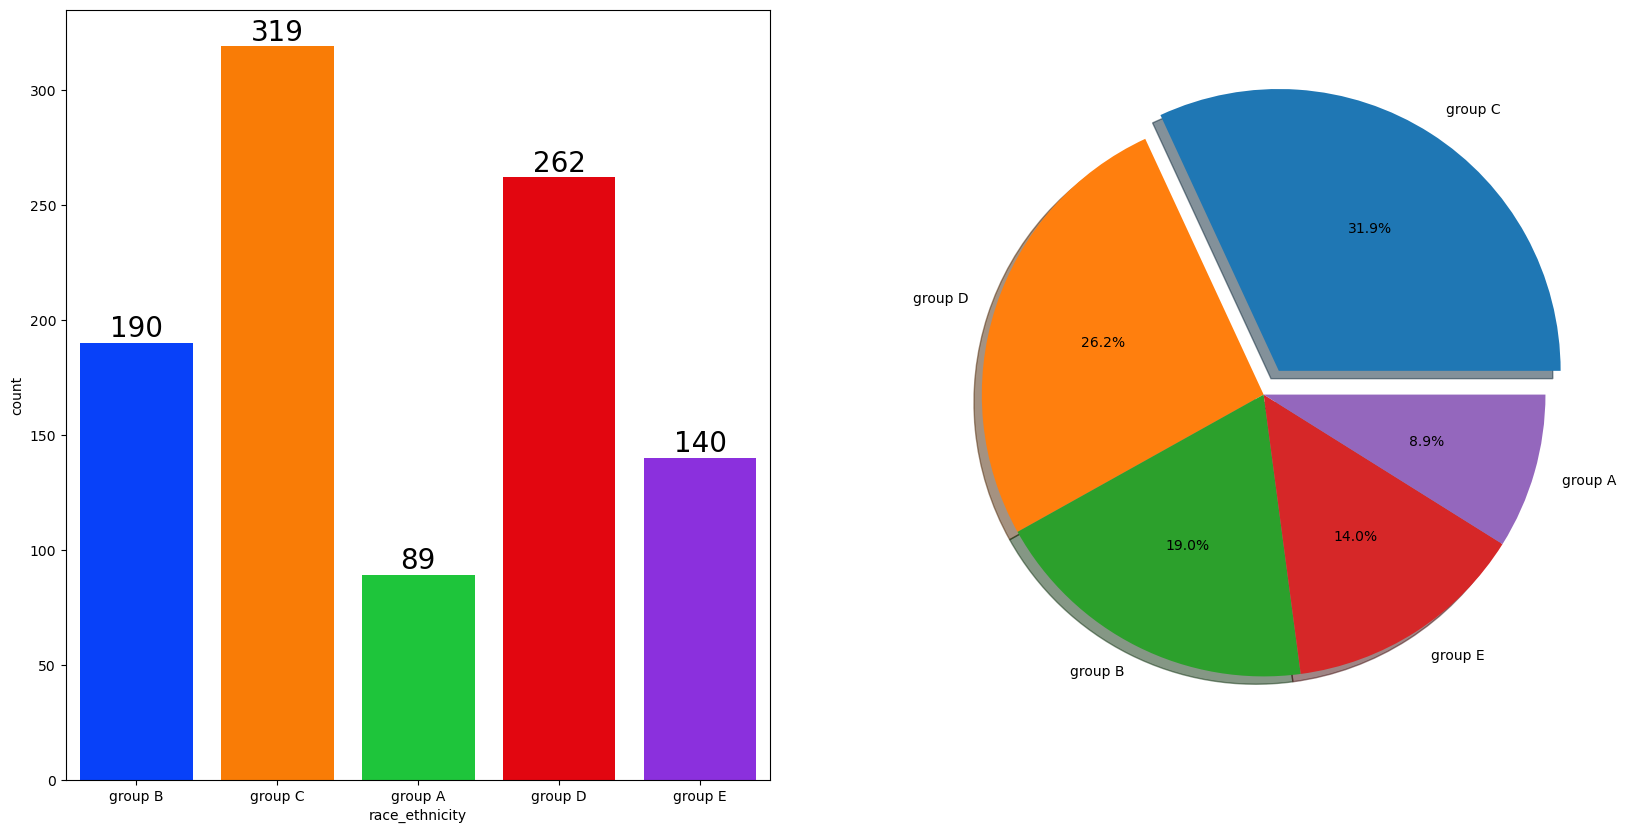

In [34]:
f, ax=plt.subplots(1, 2,figsize=(20, 10))
sns.countplot(x=data['race_ethnicity'], data=data, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=data['race_ethnicity'].value_counts(), 
        labels=data['race_ethnicity'].value_counts().index, 
        explode=[0.1,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True)
plt.show() 

In [39]:
group_data2 = data.groupby('race_ethnicity')
group_data2

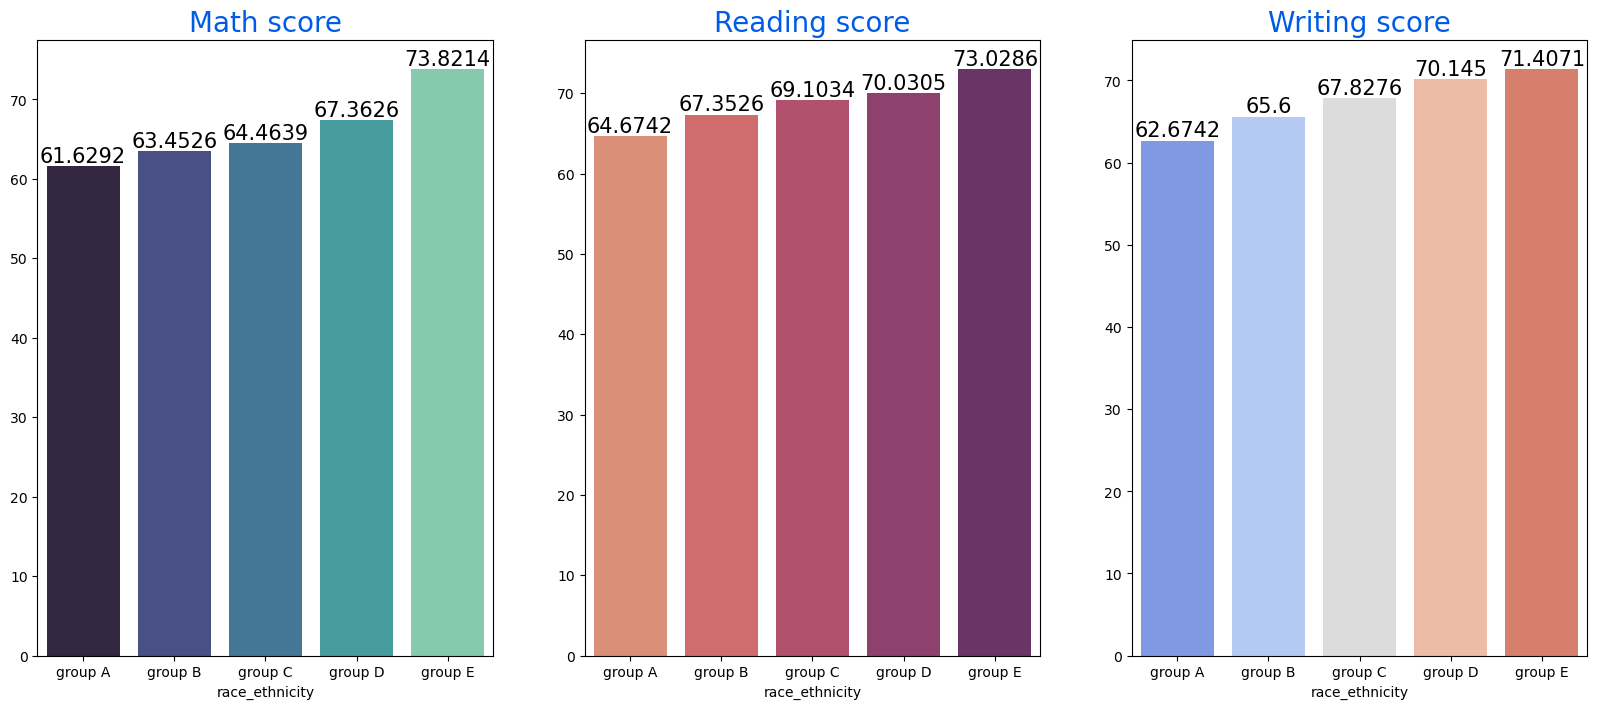

In [40]:
f, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=group_data2['math_score'].mean().index, y=group_data2['math_score'].mean().values, palette = 'mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette = 'flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['writing_score'].mean().index, y=group_data2['writing_score'].mean().values, palette = 'coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

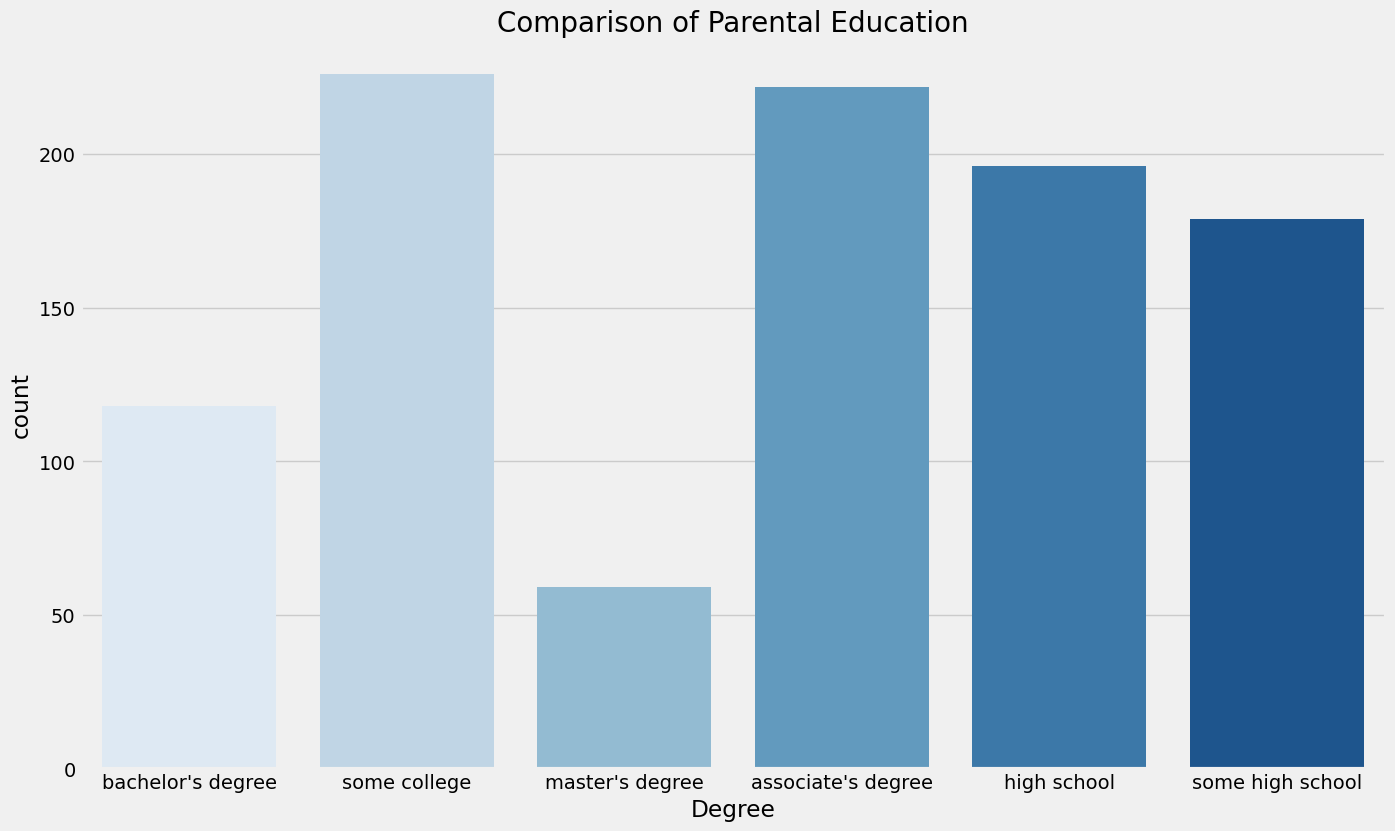

In [45]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
# sns.countplot(data['parental_level_of_education'], palette = 'Blues')
sns.countplot(x='parental_level_of_education', data=data, palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

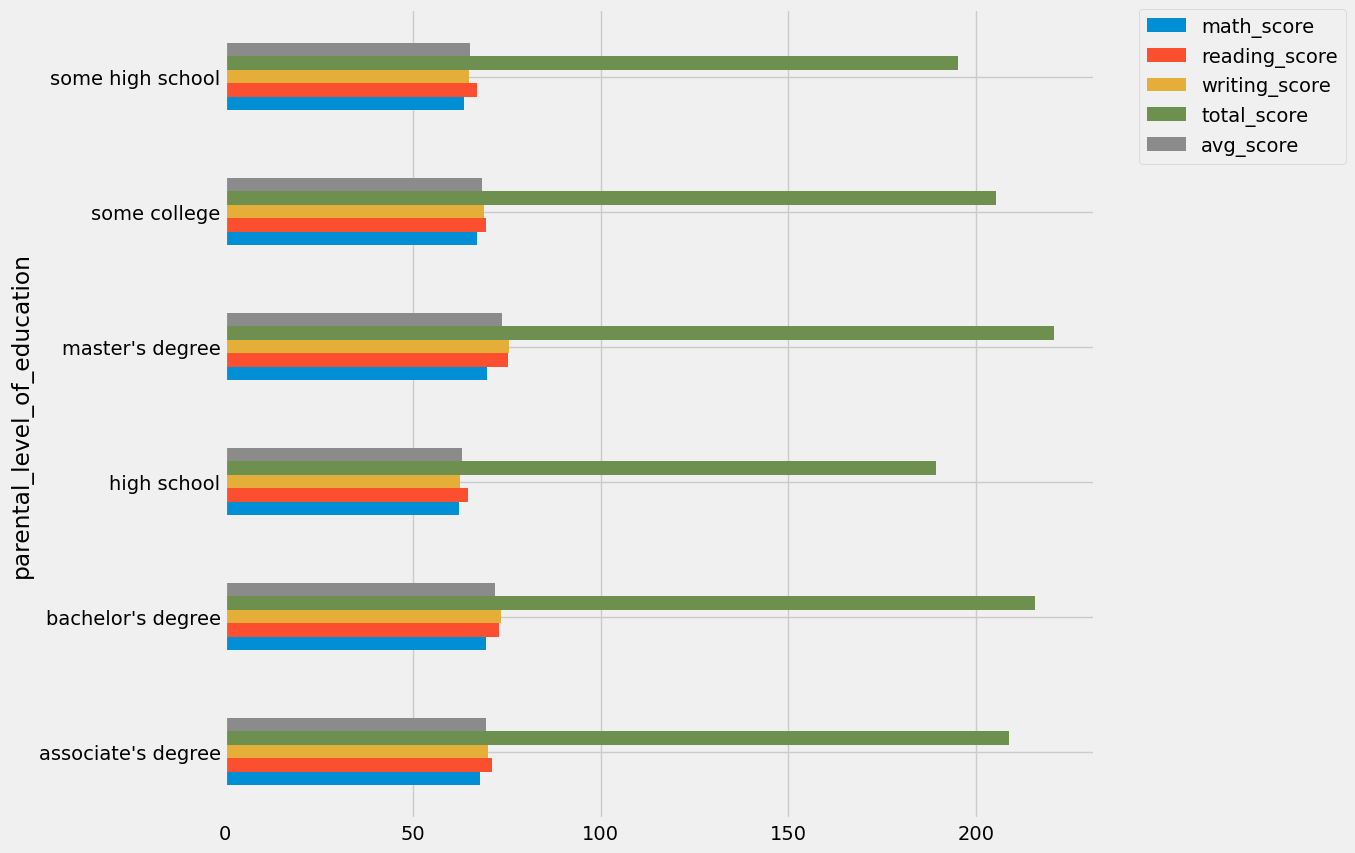

In [48]:
# data.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10,10))
grouped_data = data.groupby('parental_level_of_education')[numerical_features].mean()
grouped_data.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


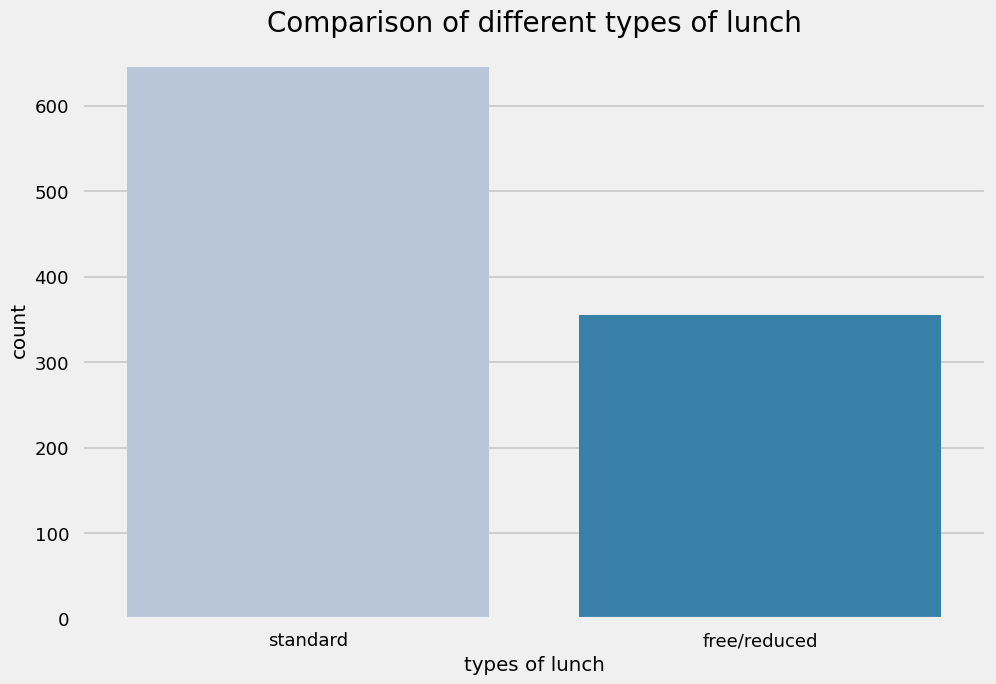

In [51]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x='lunch', data=data, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [52]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


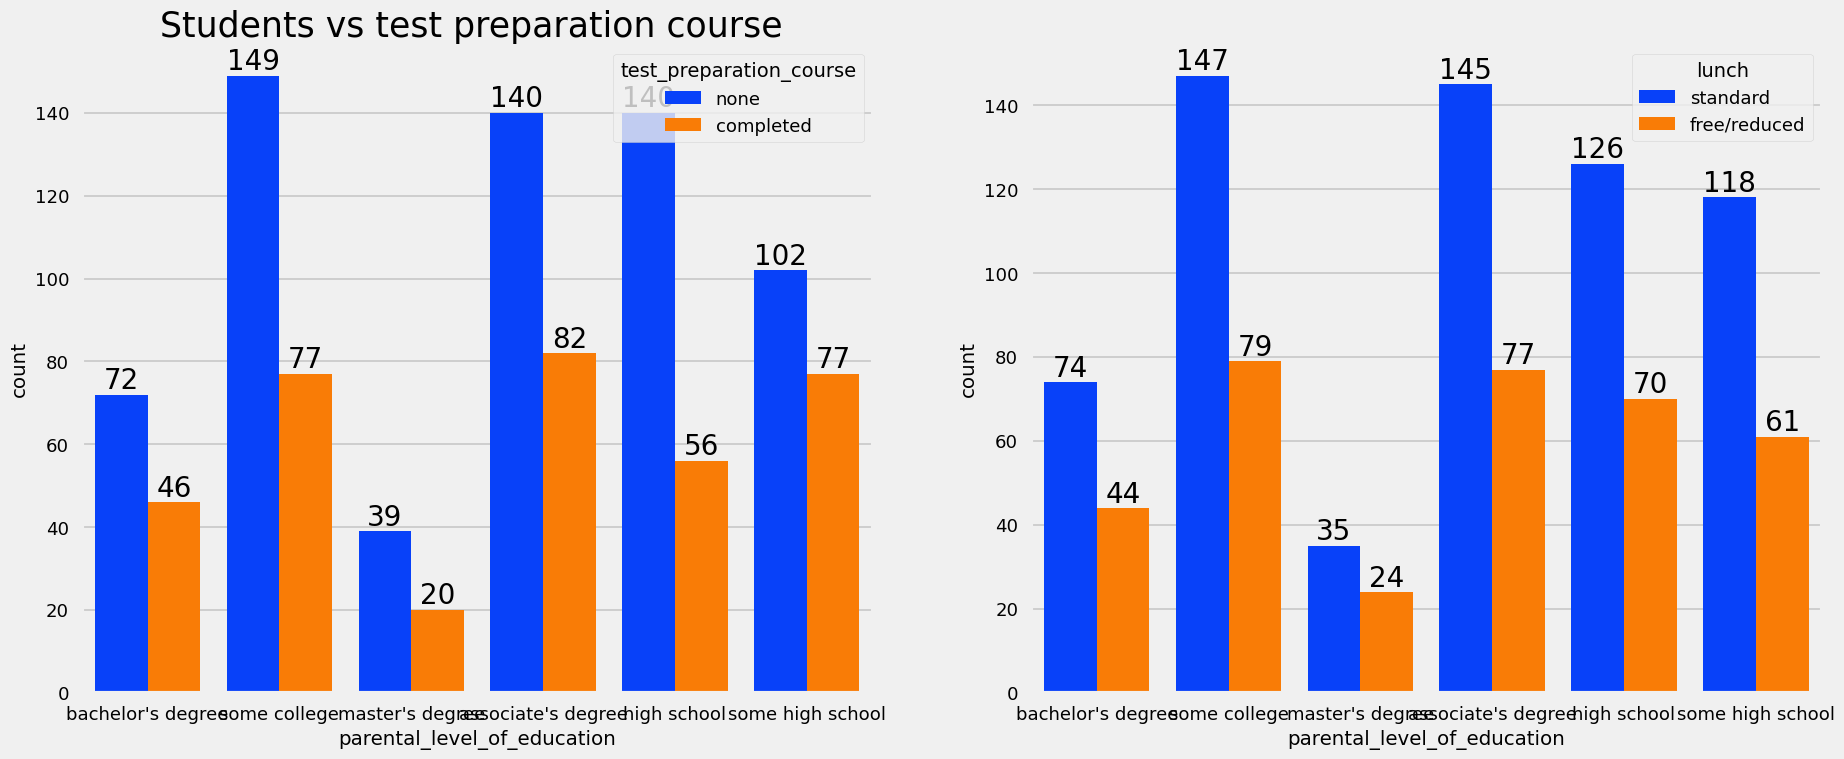

In [53]:
f, ax=plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x='parental_level_of_education', data=data, palette = 'bright', 
              hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course ', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=20)
    
sns.countplot(x="parental_level_of_education", data=data, palette = 'bright',
              hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)  

<Axes: xlabel='lunch', ylabel='writing_score'>

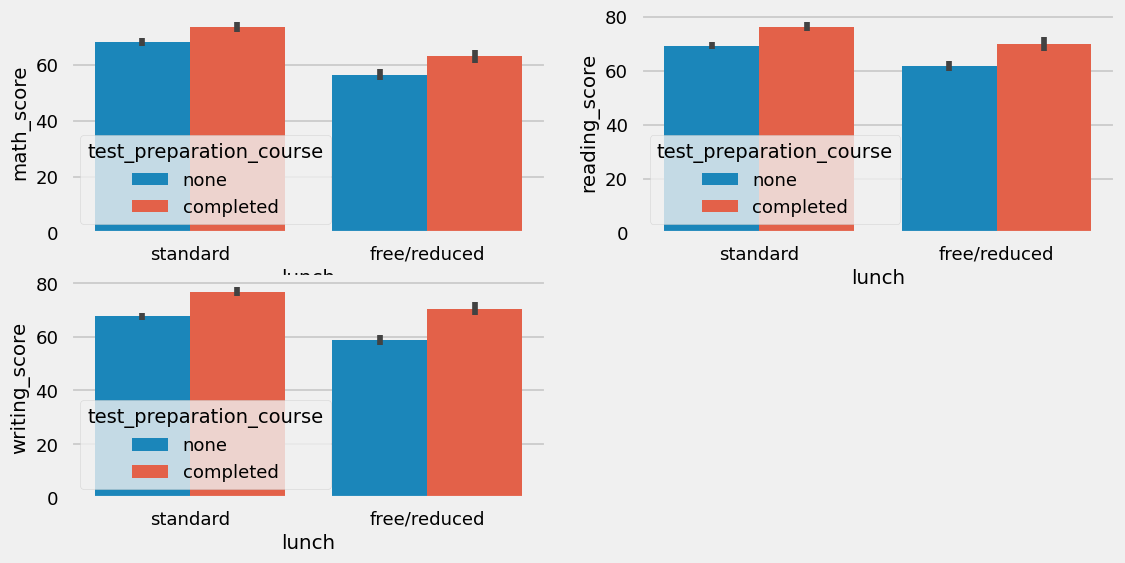

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])

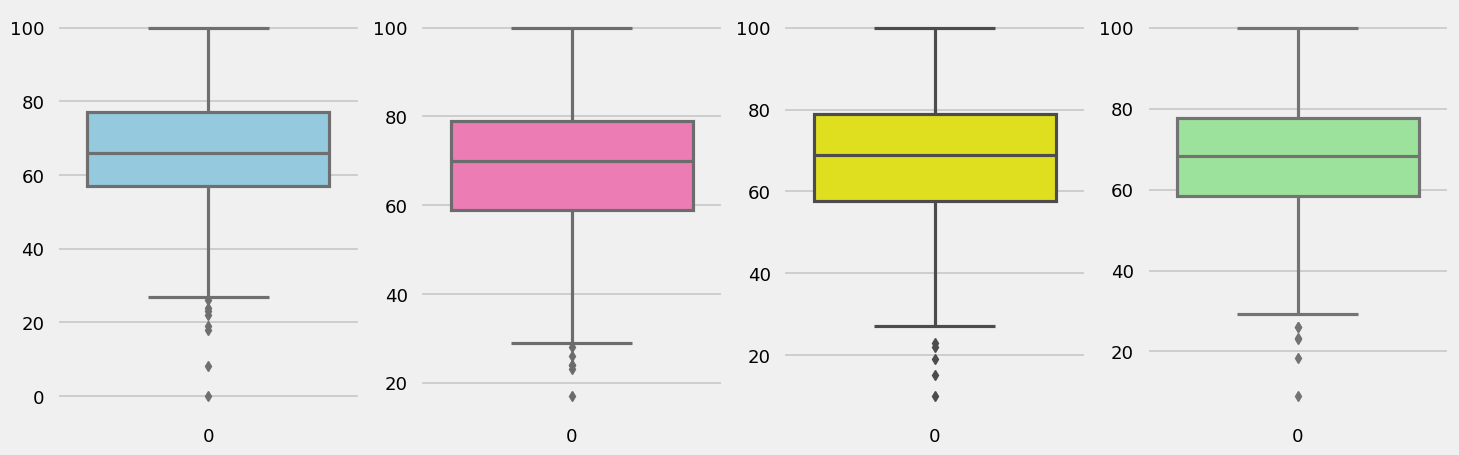

In [55]:
plt.subplots(1, 4,figsize=(16, 5))
plt.subplot(141)
sns.boxplot(data['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(data['avg_score'], color='lightgreen')
plt.show()

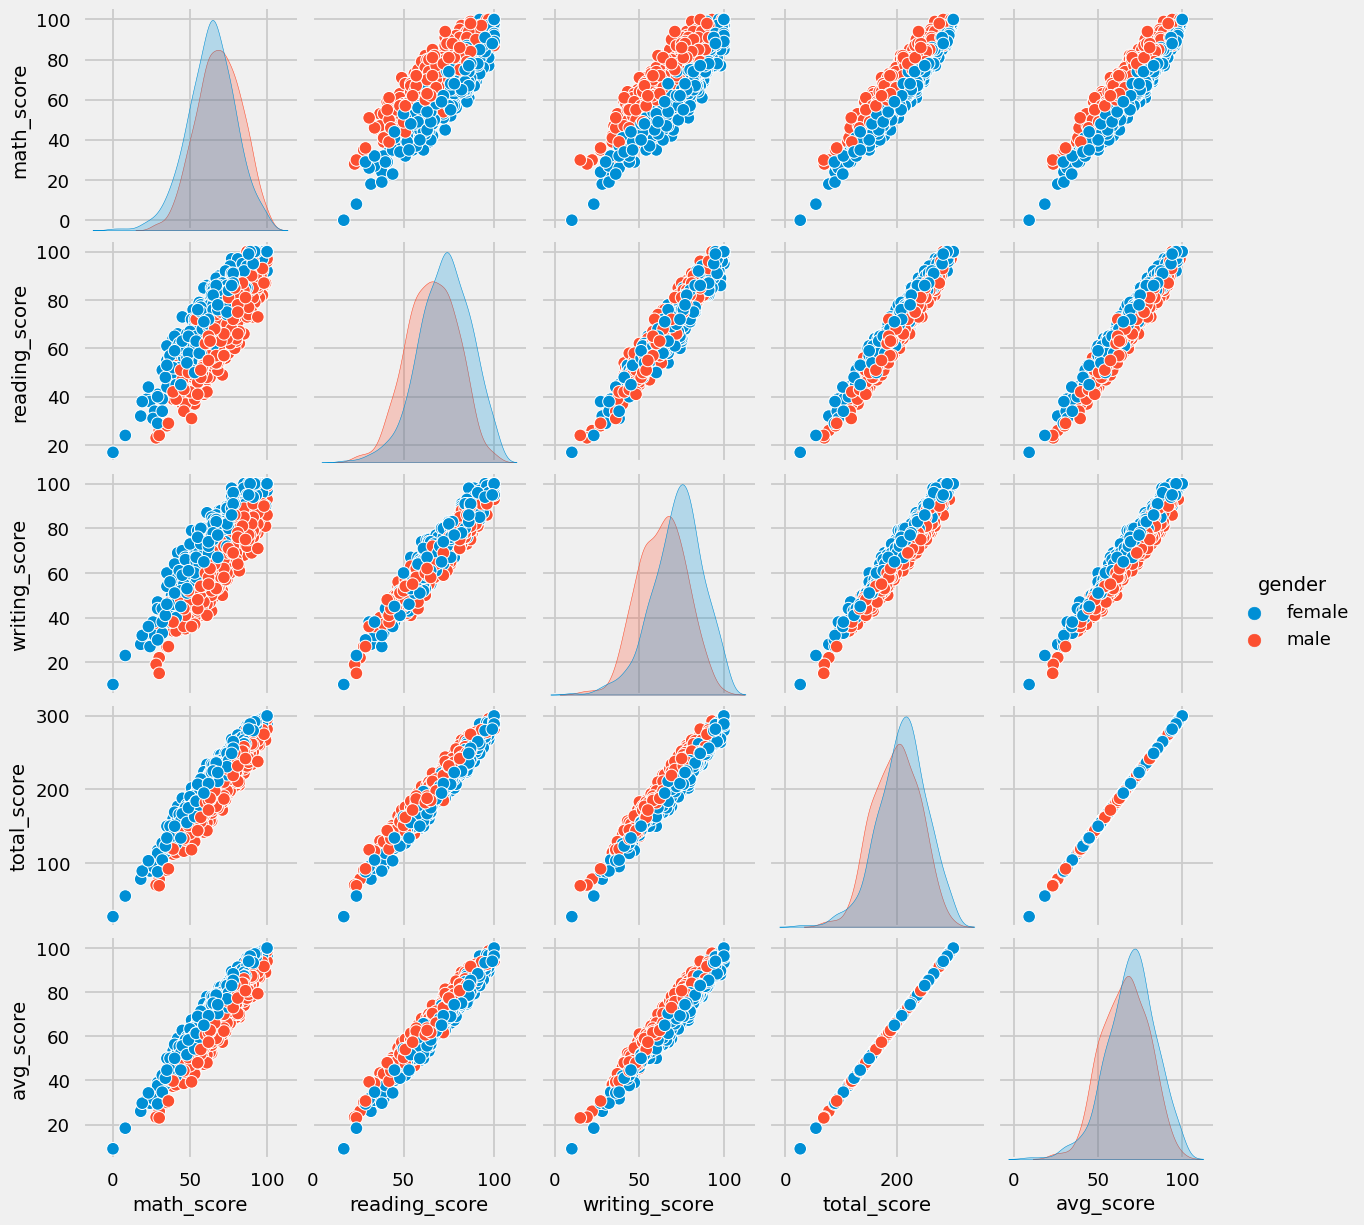

In [56]:
sns.pairplot(data, hue = 'gender')
plt.show()